In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,359783,7315304329,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,NaN,tx,32.856500,-96.599900,2021-05-01T10:15:37-0500,200
290125,358083,7316875320,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,NaN,black,tx,32.818710,-96.992283,2021-05-04T14:06:55-0500,8900
290126,152315,7313432323,2013.0,NaN,Scion xB,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,NaN,wagon,NaN,ia,42.484503,-92.324974,2021-04-27T13:00:51-0500,7300
290127,117952,7316213204,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,full-size,SUV,red,ga,33.938100,-84.197200,2021-05-03T11:23:11-0400,4500




the misssing values in the condition can be found using odometer as mileage affects condition of car.

what i am trying to do here is finding mean value of odometer readings grouping by there conditions


# ----------------------------------------------------
## condition
# ----------------------------------------------------

here we will use the odometer to fill the condition value
for example
> calculates the mean value of the 'odometer' column for rows where the 'condition' column is equal to 'excellent'

In [3]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [4]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 92809.42
Excellent average odometer: 105848.45
Good average odometer: 83121.56
Fair average odometer: 212906.57
Salvage average odometer: 242048.58


these are mean values regarding each condition.

now these can be used to group the odometer readings which have nan values in condition.

In [5]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')



the values are being filled by the values from above calculated mean value ranges


In [6]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [7]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,20768400,71.583
cylinders,11930000,41.120
drive,8808700,30.361
paint_color,8711300,30.026
type,6259600,21.575
manufacturer,1134200,3.909
title_status,506600,1.746
long,440300,1.518
lat,440300,1.518
fuel,145300,0.501


In [8]:
df['condition']

0         excellent
1           salvage
2           salvage
3         excellent
4              good
            ...    
290124     like new
290125         good
290126    excellent
290127         good
290128     like new
Name: condition, Length: 290129, dtype: object

# ----------------------------------------------------
## manufacturer
# ----------------------------------------------------

In [9]:
manufacturer_values = df['manufacturer'].value_counts()

In [10]:
print(manufacturer_values)

ford               48457
chevrolet          37324
toyota             23396
honda              14545
jeep               13052
nissan             12920
ram                12056
gmc                11373
bmw                10174
dodge               9317
mercedes-benz       7946
hyundai             7127
subaru              6513
volkswagen          6425
kia                 5750
lexus               5653
audi                5185
cadillac            4817
chrysler            4121
acura               4108
buick               3792
mazda               3699
infiniti            3310
lincoln             2908
mitsubishi          2275
volvo               2254
mini                1657
pontiac             1553
jaguar              1358
rover               1236
porsche              967
mercury              805
saturn               734
alfa-romeo           616
tesla                595
fiat                 555
harley-davidson       79
ferrari               58
datsun                42
aston-martin          21


In [11]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [12]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [13]:
df['model']

0           others
1           others
2           others
3           others
4             rav4
            ...   
290124     charger
290125      others
290126      others
290127    wrangler
290128      others
Name: model, Length: 290129, dtype: object

# ----------------------------------------------------
## year
# ----------------------------------------------------

In [14]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)
df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

C:\Users\emana\AppData\Local\Temp\ipykernel_43324\972725070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


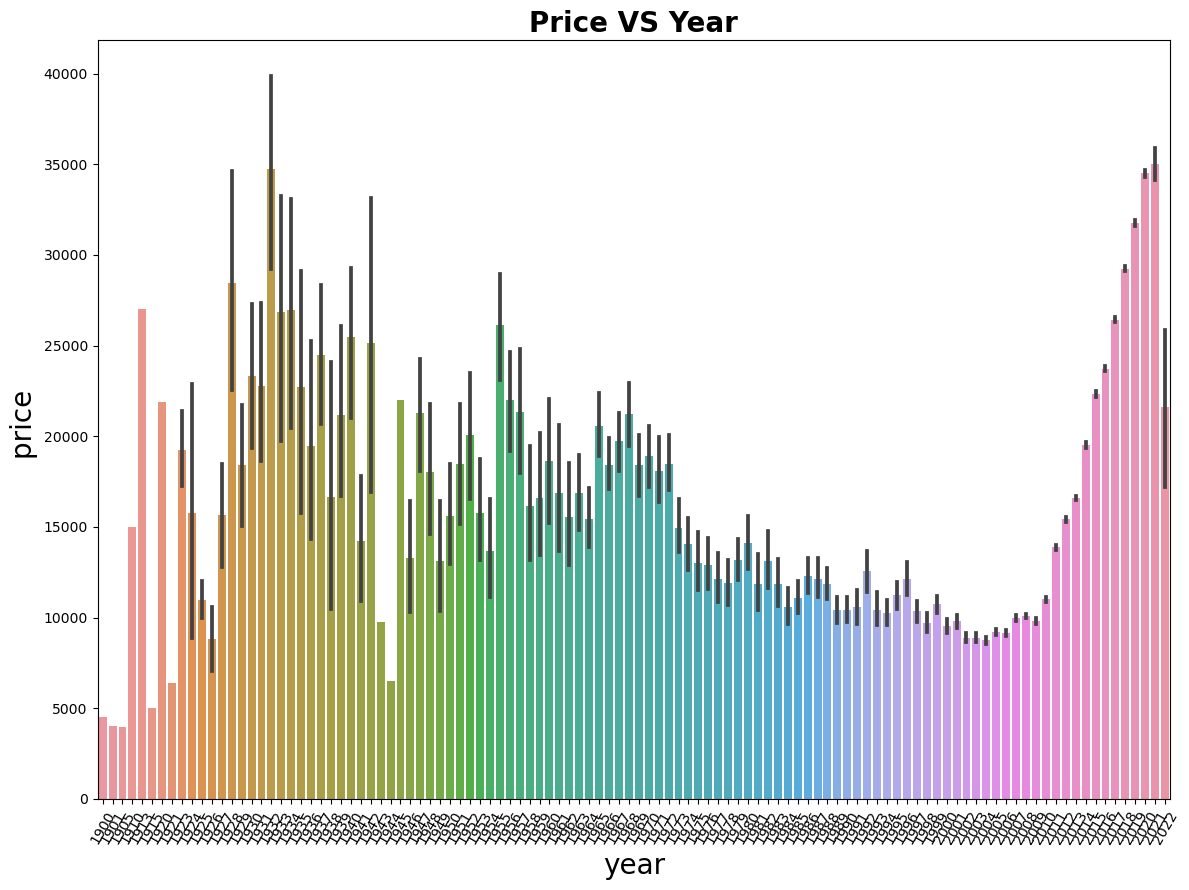

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df['year'] = df['year'].astype(int)
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=df['price'],x=df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

In [16]:
df = df[df['year'] > 1996]
df.shape

(231572, 20)

We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996


In [17]:
df['year'] = 2023 - df['year']



In [18]:
df['year']

0         16
1         15
2         20
4         15
5         13
          ..
290122    13
290125    10
290126    10
290127    14
290128     9
Name: car_age, Length: 231572, dtype: int32

# ----------------------------------------------------
## model
# ----------------------------------------------------

In [19]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [20]:
for i in df.columns:
    print(i, len(df[i].value_counts().index))

Unnamed: 0 231572
id 231572
manufacturer 21
model 50
condition 6
cylinders 8
fuel 5
odometer 73645
title_status 6
transmission 3
drive 3
size 4
type 13
paint_color 12
state 51
lat 33115
long 33409
posting_date 213149
price 11241
car_age 26
